In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# 스포티파이 API를 이용한 데이터가 수집된 상태입니다.

df = pd.read_csv('audio_feature.csv')
df

,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature,TRACK_ID
0,0.620,0.586,1,-6.612,1,0.2120,0.1550,0.000000,0.5350,0.487,137.131,130980,4,000TJlEJQ3nafsm1hBWpoj
1,0.579,0.761,0,-5.550,1,0.0516,0.0975,0.001820,0.2730,0.286,126.163,148095,4,001op3H5t7sehq5JCG2PvM
2,0.585,0.683,8,-3.827,1,0.0523,0.7370,0.000000,0.1140,0.493,128.018,157987,3,002wiS64p2qXaYYVAP7KOW
3,0.557,0.845,5,-9.292,0,0.0466,0.2690,0.859000,0.1300,0.799,111.562,128090,4,003DYiYPxYSgbtRTXzkcf6
4,0.611,0.399,11,-11.474,0,0.0357,0.7220,0.000164,0.2590,0.310,122.880,296267,3,003iZmWziYecRnqwchpdQf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56890,0.651,0.720,9,-6.529,1,0.1610,0.3310,0.413000,0.5280,0.705,90.024,269245,4,7zy7iE31dGO70ShMXghsfj
56891,0.780,0.858,7,-6.331,0,0.1280,0.3570,0.000000,0.0937,0.500,93.984,291002,4,7zyEA6ntsqPH7sLc1YYK26
56892,0.482,0.865,2,-4.930,1,0.1710,0.1100,0.000000,0.0903,0.822,179.792,182350,4,7zyzK3nsLKF5uTPmHW4PqO
56893,0.549,0.590,0,-7.498,0,0.0293,0.7360,0.000188,0.1490,0.485,124.991,268894,4,7zzPS1pWJShggLI763s9jb


In [5]:
df.describe()

,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,5.689500e+04,56895.000000
mean,0.612620,0.629761,5.305703,-7.086400,0.608296,0.091620,0.313743,0.072453,0.190691,0.495112,120.863352,2.111280e+05,3.927340
std,0.150538,0.223793,3.581536,3.643767,0.488135,0.096836,0.315386,0.216725,0.151635,0.233977,28.586690,7.070177e+04,0.362049
min,0.000000,0.001530,0.000000,-35.987000,0.000000,0.000000,0.000000,0.000000,0.011300,0.000000,0.000000,2.650700e+04,0.000000
25%,0.513000,0.478000,2.000000,-8.667000,0.000000,0.036200,0.040500,0.000000,0.099300,0.308000,98.475000,1.762930e+05,4.000000
50%,0.625000,0.662000,5.000000,-6.315000,1.000000,0.051300,0.187000,0.000002,0.128000,0.489000,120.386000,2.052630e+05,4.000000
75%,0.723000,0.812000,8.000000,-4.621000,1.000000,0.098100,0.552000,0.000851,0.242000,0.679000,139.702000,2.372000e+05,4.000000
max,0.979000,1.000000,11.000000,2.383000,1.000000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06,5.000000


In [33]:
# 일부 컬럼 제거

df2 = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'insrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
df2.describe()

,danceability,energy,loudness,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms
count,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,56895.000000,5.689500e+04
mean,0.612620,0.629761,-7.086400,0.091620,0.313743,0.072453,0.190691,0.495112,120.863352,2.111280e+05
std,0.150538,0.223793,3.643767,0.096836,0.315386,0.216725,0.151635,0.233977,28.586690,7.070177e+04
min,0.000000,0.001530,-35.987000,0.000000,0.000000,0.000000,0.011300,0.000000,0.000000,2.650700e+04
25%,0.513000,0.478000,-8.667000,0.036200,0.040500,0.000000,0.099300,0.308000,98.475000,1.762930e+05
50%,0.625000,0.662000,-6.315000,0.051300,0.187000,0.000002,0.128000,0.489000,120.386000,2.052630e+05
75%,0.723000,0.812000,-4.621000,0.098100,0.552000,0.000851,0.242000,0.679000,139.702000,2.372000e+05
max,0.979000,1.000000,2.383000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06


In [35]:
# 박자가 0인 행 제외

df2 = df2.drop(df2[df2['tempo'] == 0].index)
df2.describe()

,danceability,energy,loudness,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms
count,56892.000000,56892.000000,56892.000000,56892.000000,56892.000000,56892.000000,56892.000000,56892.000000,56892.000000,5.689200e+04
mean,0.612652,0.629775,-7.086099,0.091625,0.313725,0.072436,0.190678,0.495139,120.869725,2.111324e+05
std,0.150476,0.223786,3.643389,0.096836,0.315371,0.216702,0.151614,0.233955,28.573967,7.070078e+04
min,0.061100,0.001530,-35.987000,0.022000,0.000000,0.000000,0.011300,0.000000,35.480000,2.650700e+04
25%,0.513000,0.478000,-8.666250,0.036200,0.040500,0.000000,0.099300,0.308000,98.482500,1.763052e+05
50%,0.625000,0.662000,-6.315000,0.051300,0.187000,0.000002,0.128000,0.489000,120.392000,2.052650e+05
75%,0.723000,0.812000,-4.621000,0.098100,0.552000,0.000849,0.242000,0.679000,139.702000,2.372000e+05
max,0.979000,1.000000,2.383000,0.966000,0.996000,0.986000,0.993000,0.990000,229.829000,3.784176e+06


### GMM 군집화

#### 여러 컬럼 중 군집화가 잘 이루어지는 컬럼 5개 선정

C:\Users\rnlay\AppData\Local\Temp\ipykernel_10368\3513453335.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_x'] = df_pca[:, 0]
C:\Users\rnlay\AppData\Local\Temp\ipykernel_10368\3513453335.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gmm['pca_y'] = df_pca[:, 1]
C:\Users\rnlay\AppData\Local\Temp\ipykernel_10368\3513453335.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

0    16393
4    13839
3     8898
1     6291
5     5869
2     5602
Name: GMM_cluster, dtype: int64
0.18147774513498727


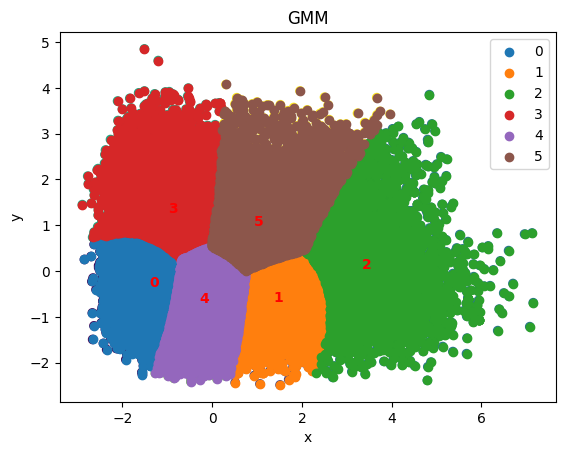

In [36]:
#=========================#
df_gmm = df2[['danceability', 'energy', 'loudness', 'acousticness', 'tempo']]
#=========================#
n = 6
#=========================#

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_gmm)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

gmm = GaussianMixture(n_components=n, random_state=42)
gmm.fit(df_pca)

df_gmm['pca_x'] = df_pca[:, 0]
df_gmm['pca_y'] = df_pca[:, 1]
df_gmm['GMM_cluster'] = gmm.predict(df_pca)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=gmm.predict(df_pca), cmap='viridis')
    
cluster_counts = df_gmm['GMM_cluster'].value_counts()
print(cluster_counts)

# 마커 클러스터 표시
for cluster in range(n):
    cluster_points = df_gmm[df_gmm['GMM_cluster'] == cluster]
    plt.scatter(cluster_points['pca_x'], cluster_points['pca_y'], label=str(cluster), cmap='viridis')
    centroid = gmm.means_[cluster]
    plt.annotate(str(cluster), (centroid[0], centroid[1]), fontsize=10, fontweight='bold', color='red')

score = silhouette_score(df_scaled, gmm.predict(df_pca))
print(score)
plt.title('GMM')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# 특정 음원과 코사인 유사도가 높은 곡 추출하기

In [37]:
# 기존 데이터에 군집 추가

gmm_cluster = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']]
df_cluster = pd.merge(gmm_cluster, df, left_index=True, right_index=True)
df_cluster = df_cluster.reset_index(drop=True)
df_cluster

,GMM_cluster,pca_x,pca_y,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature,TRACK_ID
0,4,-0.320781,0.399340,0.620,0.586,1,-6.612,1,0.2120,0.1550,0.000000,0.5350,0.487,137.131,130980,4,000TJlEJQ3nafsm1hBWpoj
1,0,-0.905341,0.323990,0.579,0.761,0,-5.550,1,0.0516,0.0975,0.001820,0.2730,0.286,126.163,148095,4,001op3H5t7sehq5JCG2PvM
2,4,0.110590,0.382812,0.585,0.683,8,-3.827,1,0.0523,0.7370,0.000000,0.1140,0.493,128.018,157987,3,002wiS64p2qXaYYVAP7KOW
3,4,-0.158789,0.008612,0.557,0.845,5,-9.292,0,0.0466,0.2690,0.859000,0.1300,0.799,111.562,128090,4,003DYiYPxYSgbtRTXzkcf6
4,1,1.940565,-0.026014,0.611,0.399,11,-11.474,0,0.0357,0.7220,0.000164,0.2590,0.310,122.880,296267,3,003iZmWziYecRnqwchpdQf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56887,4,-0.201246,-0.970782,0.651,0.720,9,-6.529,1,0.1610,0.3310,0.413000,0.5280,0.705,90.024,269245,4,7zy7iE31dGO70ShMXghsfj
56888,4,-0.774380,-1.347013,0.780,0.858,7,-6.331,0,0.1280,0.3570,0.000000,0.0937,0.500,93.984,291002,4,7zyEA6ntsqPH7sLc1YYK26
56889,3,-1.338166,2.229598,0.482,0.865,2,-4.930,1,0.1710,0.1100,0.000000,0.0903,0.822,179.792,182350,4,7zyzK3nsLKF5uTPmHW4PqO
56890,5,0.972483,0.382382,0.549,0.590,0,-7.498,0,0.0293,0.7360,0.000188,0.1490,0.485,124.991,268894,4,7zzPS1pWJShggLI763s9jb


In [38]:
# 예시 음원
df_sample = df_gmm[['GMM_cluster', 'pca_x', 'pca_y']].sample(1)
df_sample = pd.merge(df_sample, df, left_index=True, right_index=True)
df_sample

,GMM_cluster,pca_x,pca_y,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature,TRACK_ID
18939,1,1.241981,0.051249,0.497,0.605,5,-10.443,0,0.332,0.555,0.00511,0.112,0.55,106.504,219839,3,2ZeOfPFAgyC2z5yhLKOs2f


In [39]:
# 예시 음원의 군집

sample_cluster = df_sample['GMM_cluster'].values[0]
sample_cluster

1

In [40]:
# 예시 음원과 같은 군집 내의 음원

df_same_cluster = df_cluster[df_cluster['GMM_cluster'] == sample_cluster]
df_same_cluster.sample(10)

,GMM_cluster,pca_x,pca_y,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature,TRACK_ID
4206,1,0.869205,-1.282268,0.640,0.619,9,-7.991,1,0.0431,0.633,0.000156,0.0662,0.714,78.002,239960,4,0YtosUEG3muRaAsffrIWem
13455,1,2.596102,-0.876775,0.798,0.249,4,-13.264,1,0.1140,0.903,0.786000,0.2240,0.147,121.629,233463,4,1oTlv96jDLIc4OIVieTe5K
16131,1,0.945188,-1.033289,0.592,0.461,8,-8.146,1,0.0537,0.392,0.000255,0.1070,0.386,82.132,202453,4,2B28RMOZtOh6UeQZ721Fd0
26908,1,0.736189,-1.946030,0.941,0.460,2,-10.775,1,0.0711,0.434,0.055500,0.0599,0.730,101.839,178680,4,3f8PxjyzGScfVlfYPXCLSP
4841,1,2.105774,-0.648824,0.596,0.279,0,-8.328,1,0.0266,0.830,0.000173,0.0767,0.515,97.785,226933,3,0e2A28hBszcGqhbxKFBnwV
39221,1,2.048631,-1.056827,0.492,0.338,0,-8.028,1,0.0284,0.723,0.000004,0.1300,0.136,66.901,244846,4,5M75ChNoDtoo4SLfcv4dwM
35267,1,0.641111,-1.303073,0.672,0.475,0,-8.033,1,0.0444,0.329,0.000211,0.1320,0.550,84.177,141867,4,4oDdsZSAocBjSn49I3Ne3c
20856,1,2.301865,-0.709920,0.690,0.320,4,-11.148,1,0.0287,0.885,0.002450,0.1020,0.518,110.099,197467,4,2pdZFDKmPsgzqMzTbOFIJI
43966,1,1.832377,-0.199366,0.468,0.406,0,-6.128,0,0.0353,0.914,0.000000,0.1000,0.486,92.739,48784,4,61LMcq2d9quUkSdtpi32e1
17350,1,0.737357,-1.383870,0.629,0.504,9,-9.024,0,0.0304,0.274,0.000077,0.0751,0.553,75.006,262970,4,2LkVHPQuCwEGKUswTh3ZIP


In [41]:
# 군집화에 사용된 컬럼들의 벡터값 추출
df_sample_vector = df_sample[['danceability', 'energy', 'loudness', 'acousticness', 'tempo']].values # 유저가 선택한 음원
df_same_cluster_vector = df_same_cluster[['danceability', 'energy', 'loudness', 'acousticness', 'tempo']].values # 같은 군집 내 음원들

In [43]:
# 예시음원과 같은 군집내에서 코사인 유사도가 높은 n곡 추출
cosine_similarities = cosine_similarity(df_sample_vector, df_same_cluster_vector)
similar1 = np.argsort(cosine_similarities, axis=1)[:, ::-1]
similar2 = similar1.flatten()
top = df_same_cluster.iloc[similar2]
top['similarity'] = cosine_similarities.flatten()[similar2]

top['rank'] = np.arange(1, len(top)+1)

C:\Users\rnlay\AppData\Local\Temp\ipykernel_10368\1751102651.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['similarity'] = cosine_similarities.flatten()[similar2]
C:\Users\rnlay\AppData\Local\Temp\ipykernel_10368\1751102651.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top['rank'] = np.arange(1, len(top)+1)


In [44]:
top10 = top[0:9]
top10

,GMM_cluster,pca_x,pca_y,danceability,energy,music_key,loudness,music_mode,speechiness,acousticness,insrumentalness,liveness,valence,tempo,duration_ms,time_signature,TRACK_ID,similarity,rank
18937,1,1.241981,0.051249,0.497,0.605,5,-10.443,0,0.3320,0.555,0.005110,0.1120,0.550,106.504,219839,3,2ZeOfPFAgyC2z5yhLKOs2f,1.000000,1
12532,1,1.425359,-0.152937,0.459,0.497,4,-9.208,0,0.0381,0.537,0.000526,0.0734,0.203,94.095,187947,3,1gx9wnzUMbwSu5S62GUY8D,1.000000,2
53914,1,1.690113,0.193529,0.434,0.463,4,-10.192,1,0.0271,0.557,0.000051,0.2350,0.466,103.676,201280,4,7an3ds5rVX0MMGdR6rA3pi,0.999999,3
34296,1,1.250294,0.026167,0.453,0.498,9,-9.818,1,0.0344,0.394,0.000000,0.3060,0.435,100.248,224213,3,4fxEbrtZmbcnWqrPEgEHdv,0.999999,4
13550,1,1.248244,0.024242,0.454,0.498,9,-9.818,1,0.0342,0.394,0.000000,0.3060,0.437,100.327,224213,3,1pBKwjJu2ooTXVN9mWpVZY,0.999999,5
20655,1,1.052239,-0.556340,0.500,0.515,7,-8.283,1,0.3100,0.442,0.000180,0.0681,0.566,85.173,200968,4,2ns1kl3c5NMvGCt2xVMNlI,0.999999,6
50361,1,1.012244,-0.267152,0.550,0.663,7,-10.098,0,0.0546,0.577,0.032300,0.1040,0.329,102.024,249412,4,6uBaBF0qVp3KjPZDSwQwzm,0.999999,7
12028,1,1.230116,0.002672,0.709,0.667,2,-13.550,1,0.0730,0.660,0.000000,0.1160,0.961,136.658,220240,4,1ci6UGJbTuVuMzWOFEJqtp,0.999999,8
39178,1,1.522575,-0.026401,0.607,0.516,6,-11.963,0,0.0975,0.602,0.706000,0.5990,0.967,121.485,72000,4,5LiO40bi3foQNkIDg4PlGV,0.999999,9


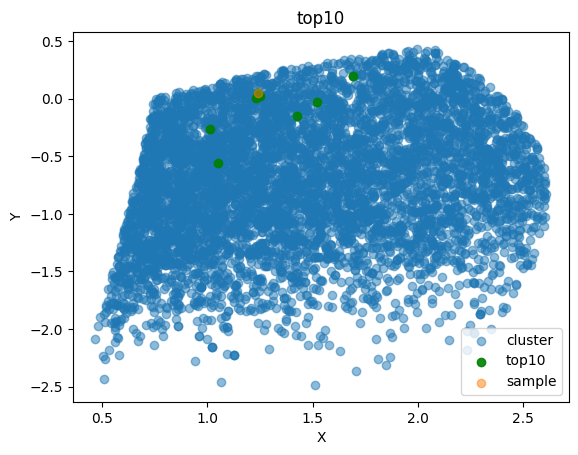

In [45]:
# 해당 군집 그래프

plt.scatter(df_same_cluster['pca_x'], df_same_cluster['pca_y'], label='cluster', alpha=0.5)
plt.scatter(top10['pca_x'], top10['pca_y'], label='top10', alpha=0.9, marker='o', color='green')
plt.scatter(df_sample['pca_x'], df_sample['pca_y'], label='sample', alpha=0.5)

plt.legend()
plt.title('top10')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()